<a href="https://colab.research.google.com/github/kmrakovcic/FoP_ML_workshop23/blob/master/04_deep_learning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#How to make machines learn?
In last chapter we talked about creating the structure that could predict the data, however we skipped the part about making the neural networks learn from its own mistakes. This part is essential in machine learning, and it makes neural networks powerful.

## Just the optimization problem
Leaving all the intuition aside, only strictly looking, neural networks are just a function with a lot of parameters. Learning is just optimizing the parameters of the NN to the data. The only issue is how to create an optimization algorithm that is robust enough to work in the parameter space that has an order of magnitude million dimensions. Currently, the most used algorithm is called **"Gradient descent"** and its application in the neural networks which we call **"Backpropagation"**.

##Lectures


1.  Gradient Descent: [video](https://www.youtube.com/watch?v=IHZwWFHWa-w), [text](https://www.3blue1brown.com/lessons/gradient-descent)
2.  Backpropagation: [video](https://www.youtube.com/watch?v=Ilg3gGewQ5U), [text](https://www.3blue1brown.com/lessons/backpropagation)
3.  Calculating Backpropagation: [video](https://www.youtube.com/watch?v=tIeHLnjs5U8), [text](https://www.3blue1brown.com/lessons/backpropagation-calculus)

## Conclusion
To train the neural network following steps must be applied:


1.   **Forward propagation**: Calculate the activations of all of the neurons from the beginning to the end
2.   **Backpropagation**: Calculate the gradients from the end to the beginning
3.   **Evolution**: Calculate new weights and biases using old weights and biases and calculated gradients

#Problem 1
Train the [neural network](https://colab.research.google.com/github/kmrakovcic/FoP_ML_workshop23/blob/master/03_deep_learning1.ipynb#scrollTo=owrsJoVCI7PD) to predict square function for 1000 epochs. Use 1 neuron in input layer, and one neuron on the output layer.

Use the following pseudocode for training on the one epoch:

1. **Forward propagation**
*  $a^0 = X$
*  $z^1 = W^{(0,1)} \cdot a^0 + b^0$
*  $a^1 = \sigma(z^1)$
*  $z^2 = W^{(1,2)} \cdot a^1 + b^1$
*  $a^2 = \sigma(z^2)$
*  $z^3 = W^{(2,3)} \cdot a^2 + b^2$
*  $a^3 = \sigma(z^3)$

2. **Backpropagation**
*  $\Delta^2 = a^3 - Y$
*  $\Delta^1 = \left( \Delta^2 \cdot W^{(2,3)} \right) \cdot \sigma'(z^2)$
*  $\Delta^0 = \left( \Delta^1 \cdot W^{(1,2)} \right) \cdot \sigma'(z^1)$

3. **Evolution**
*  $W^{(0,1)} = W^{(0,1)} - \alpha \left((a^0)^T \cdot \Delta^0 \right)$
*  $b^0 = b^0 - \alpha \sum_{dim=1} \Delta^0$
*  $W^{(1,2)} = W^{(1,2)} - \alpha \left((a^1)^T \cdot \Delta^1 \right)$
*  $b^1 = b^1 - \alpha \sum_{dim=1} \Delta^1$
*  $W^{(2,3)} = W^{(1,2)} - \alpha \left((a^2)^T \cdot \Delta^2 \right)$
*  $b^2 = b^2 - \alpha \sum_{dim=1} \Delta^2$

If activation function is sigmoid:
$$ \sigma(x) = \frac{1}{1+e^{-x}}$$
then derivation is:
$$ \sigma'(x) = \sigma(x) (1- \sigma(x))$$

In [ ]:
#@title My solution
# Add code here

epoch 1000 MSE: 1.0773328484707057


Text(0, 0.5, 'Predicted')

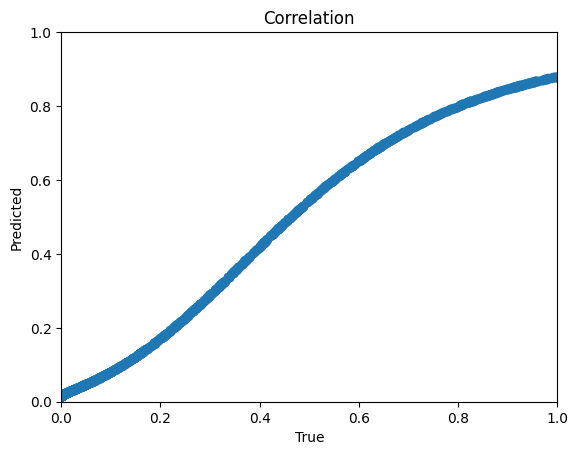

In [70]:
#@title Solution
import numpy as np
import matplotlib.pyplot as plt

# create training data
x = np.random.rand(1000, 1)
y = np.square(x)

def sigmoid(z):
    # create sigmoid function to be activation function for layers
    return 1 / (1 + np.exp(-z))

# creating random weights
w0 = np.random.rand(1, 16)*2-1
w1 = np.random.rand(16, 16)*2-1
w2 = np.random.rand(16, 1)*2-1

# creating random biases
b0 = np.random.rand(16)*2-1
b1 = np.random.rand(16)*2-1
b2 = np.random.rand(1)*2-1

for epoch in range(1000):
    # forward propagation
    a0 = x
    z1 = np.dot(a0, w0) + b0
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w1) + b1
    a2 = sigmoid(z2)

    z3 = np.dot(a2, w2) + b2
    a3 = sigmoid(z3)

    # backpropagation
    delta2 = a3 - y
    delta1 = np.dot(delta2, w2.T) * sigmoid(z2) * (1 - sigmoid(z2))
    delta0 = np.dot(delta1, w1.T) * sigmoid(z1) * (1 - sigmoid(z1))

    alpha = 0.001
    # weight and bias updates
    w0 = w0 - alpha * np.dot(a0.T, delta0)
    b0 = b0 - alpha * np.mean(delta0, axis=0).reshape(-1,)

    w1 = w1 - alpha * np.dot(a1.T, delta1)
    b1 = b1 - alpha * np.mean(delta1, axis=0).reshape(-1,)

    w2 = w2 - alpha * np.dot(a2.T, delta2)
    b2 = b2 - alpha * np.mean(delta2, axis=0).reshape(-1,)

print("epoch", epoch+1, "MSE:", np.sum((y - a3) ** 2))
fig, ax = plt.subplots()
ax.scatter (y, a3)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_title("Correlation")
ax.set_xlabel("True")
ax.set_ylabel("Predicted")

#Problem 2
Expand the code created [before](https://colab.research.google.com/github/kmrakovcic/FoP_ML_workshop23/blob/master/03_deep_learning1.ipynb#scrollTo=XUTIbkmsYk8l) using classes and make neural network learn the first 1000 train examples of the MNIST dataset. Calculate the accuracy on the test set.

In [84]:
#@title My solution
# Add code here

In [83]:
#@title Solution
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def one_hot_encode(label):
    # one hot encoding so we can compare output layer and labels
    num_classes = 10
    one_hot = np.zeros((num_classes, label.shape[0]))
    # create
    one_hot [label, range(label.shape[0])] = 1
    return one_hot.T


class NeuralNetwork:

    def __init__(self, layer_sizes):
        #defining sizes of the weights and biases for each layer
        self.layer_sizes = layer_sizes
        self.weights = [np.random.rand(x, y)*2-1 for x, y in zip(layer_sizes[:-1], layer_sizes[1:])]
        self.biases = [np.random.rand(x)*2-1 for x in layer_sizes[1:]]

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def feedforward(self, a):
        #forward propagation to get activations on the neurons on the output layer
        for i in range(len(self.layer_sizes)-1):
            a = self.sigmoid(np.dot(a, self.weights[i]) + self.biases[i])
        return a

    def backpropagate (self, x, t, learning_rate):
        a = x
        activations = [a]
        zs = [0]
		# feedforward
        for i in range(len(self.layer_sizes)-1):
            z = np.dot(a, self.weights[i]) + self.biases[i]
            zs.append(z)
            a = self.sigmoid(z)
            activations.append(a)

        # backward pass
        delta = (activations[-1] - t)
        gradients = []
        gradients.append(delta)
        for i in reversed(range(len(self.layer_sizes)-2)):
            delta = np.dot(delta, self.weights[i+1].T) * self.sigmoid(zs[i+1]) * (1 - self.sigmoid(zs[i+1]))
            gradients.append(delta)
        gradients.reverse()

        # update weights and biases
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * np.dot(activations[i].T, gradients[i])
            self.biases[i] -= learning_rate * np.mean(gradients[i], axis=0).reshape(-1,)

    def train(self, x, y, learning_rate, epochs, verbose=True):
        for i in range(epochs):
            self.backpropagate(x, y, learning_rate)
            if verbose:
                p = self.feedforward(x)
                error = np.mean(np.square(p-y))
                true_numbers = np.argmax(y, axis=-1)
                prediction_numbers = np.argmax(p, axis=-1)
                accuracy = (true_numbers == prediction_numbers).sum()/true_numbers.shape[0]
                print ("\rEPOCH", i, "Error:", error, "Accuracy:", accuracy, end="")

    def predict(self, x):
        p = self.feedforward(x)
        prediction_numbers = np.argmax(p, axis=-1)
        return prediction_numbers

# MAIN PART

# Read comma separated files that contain train and test set from disk to pandas dataframe
mnist_train_df = pd.read_csv("/content/sample_data/mnist_train_small.csv", header=None)
mnist_test_df = pd.read_csv("/content/sample_data/mnist_test.csv", header=None)

# Convert pandas dataframe to numpy array, and separate pixel values from labels
mnist_train_x = mnist_train_df.to_numpy()[:, 1:]
mnist_train_y = mnist_train_df.to_numpy()[:, 0]

mnist_test_x = mnist_test_df.to_numpy()[:, 1:]
mnist_test_y = mnist_test_df.to_numpy()[:, 0]

mnist_train_y = one_hot_encode(mnist_train_y)
mnist_test_y = one_hot_encode(mnist_test_y)

network = NeuralNetwork ([mnist_train_x.shape[1],16,16,10])
network.train (mnist_train_x, mnist_train_y, 0.0001, 200, verbose=True)

p_labels = network.predict(mnist_test_x)
y_labels = np.argmax(mnist_test_y, axis=-1)
accuracy = (y_labels == p_labels).sum()/y_labels.shape[0]
print ()
print ("Test accuracy:", accuracy)

<ipython-input-83-011b1d242eb9>:24: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


EPOCH 199 Error: 0.027747470270944104 Accuracy: 0.82945
Test accuracy: 0.8207
